# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tenso

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
#建立模型

model = Sequential()
model.add(Dense(units=256,input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 240,816
Trainable params: 240,816
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [15]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 137us/step - loss: 0.0082 - acc: 0.9973 - val_loss: 0.1367 - val_acc: 0.9773
Epoch 2/20
48000/48000 [==============================] - 6s 133us/step - loss: 0.0128 - acc: 0.9965 - val_loss: 0.1167 - val_acc: 0.9782
Epoch 3/20
48000/48000 [==============================] - 6s 134us/step - loss: 0.0103 - acc: 0.9976 - val_loss: 0.1180 - val_acc: 0.9792
Epoch 4/20
48000/48000 [==============================] - 7s 136us/step - loss: 0.0068 - acc: 0.9980 - val_loss: 0.1378 - val_acc: 0.9778
Epoch 5/20
48000/48000 [==============================] - 6s 134us/step - loss: 0.0098 - acc: 0.9971 - val_loss: 0.1345 - val_acc: 0.9762
Epoch 6/20
48000/48000 [==============================] - 6s 134us/step - loss: 0.0071 - acc: 0.9981 - val_loss: 0.1445 - val_acc: 0.9751
Epoch 7/20
48000/48000 [==============================] - 6s 134us/step - loss: 0.0096 - acc: 0.9975 - val_loss: 0.1369 - 

# 以圖形顯示訓練過程

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

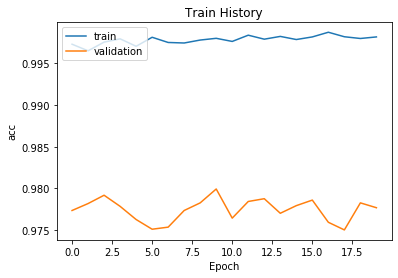

In [17]:
show_train_history(train_history,'acc','val_acc')

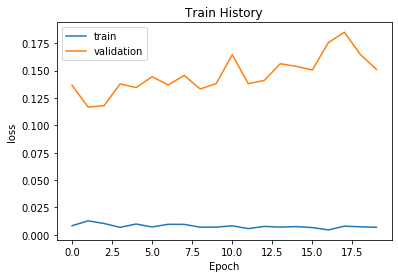

In [18]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 48us/step

accuracy= 0.9789999723434448
